In [1]:
from barplots import barplots
import os
import pandas as pd
from glob import glob
import compress_pickle

In [7]:
bad_models = [
    "GF",
    "GAE",
    "DeepWalk",
    "Laplacian",
    "SVD",
    "LINE"
]

In [19]:
grape_results = pd.concat([
    pd.read_csv(path)
    for path in glob("yue_comparison*")
])
grape_results.graph = [
    graph[3:]
    for graph in grape_results.graph
]
grape_results = grape_results[grape_results.trainable==True]
grape_results.drop(columns=["trainable"], inplace=True)
grape_results["work"] = "Grape"
grape_results = grape_results[grape_results.run_type=="test"]
indices = ["graph", "work", "method"]
grape_results = grape_results.groupby(indices).agg(["mean", "std"])
yue = pd.read_csv("yue_results.csv", index_col=[0,1,2], header=[0, 1]).reset_index()
yue = yue[~yue.method.isin(bad_models)]
yue["work"] = "Other"
yue = yue.set_index(indices)
all_results = pd.DataFrame(pd.concat([
    grape_results,
    yue
]).drop(columns=["run_type"]).to_dict())

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [20]:
pd.concat([
    grape_results,
    yue
]).sort_index()

AUPRC               AUROC            \
                                      mean       std      mean       std   
graph       work  method                                                   
CTDDDA      Grape Grape CBOW      0.979478  0.002978  0.978208  0.004023   
                  Grape GloVe     0.979975  0.001311  0.979984  0.002175   
                  Grape SkipGram  0.979357  0.000041  0.978336  0.002695   
            Other GraRep               NaN       NaN  0.960000  0.001000   
                  HOPE                 NaN       NaN  0.951000  0.001000   
                  SDNE                 NaN       NaN  0.935000  0.010000   
                  node2vec             NaN       NaN  0.911000  0.002000   
                  struc2vec            NaN       NaN  0.965000  0.001000   
DrugBankDDI Grape Grape CBOW      0.984761  0.001217  0.988044  0.000228   
                  Grape GloVe     0.982858  0.001970  0.987062  0.000800   
                  Grape SkipGram  0.979379  0.003694  0.982631  0.003676   
            Other GraRep               NaN       NaN  0.925000  0.001000   
                  HOPE                 NaN       NaN  0.923000  0.001000   
                  SDNE                 NaN       NaN  0.911000  0.006000   
                  node2vec             NaN       NaN  0.902000  0.001000   
                  struc2vec            NaN       NaN  0.904000  0.001000   
NDFRTDDA    Grape Grape CBOW      0.981779  0.004676  0.981427  0.002605   
                  Grape GloVe     0.989818  0.001785  0.986757  0.001285   
                  Grape SkipGram  0.990489  0.000055  0.988624  0.000761   
            Other GraRep               NaN       NaN  0.963000  0.001000   
                  HOPE                 NaN       NaN  0.949000  0.001000   
                  SDNE                 NaN       NaN  0.944000  0.004000   
                  node2vec             NaN       NaN  0.819000  0.005000   
                  struc2vec            NaN       NaN  0.958000  0.001000   
StringPPI   Grape Grape CBOW      0.974054  0.002468  0.973883  0.002492   
                  Grape GloVe     0.985963  0.000776  0.984718  0.000740   
                  Grape SkipGram  0.985290  0.000424  0.984225  0.000637   
            Other GraRep               NaN       NaN  0.894000  0.001000   
                  HOPE                 NaN       NaN  0.839000  0.001000   
                  SDNE                 NaN       NaN  0.884000  0.008000   
                  node2vec             NaN       NaN  0.828000  0.003000   
                  struc2vec            NaN       NaN  0.909000  0.001000   

                                  accuracy           balanced_accuracy  \
                                      mean       std              mean   
graph       work  method                                                 
CTDDDA      Grape Grape CBOW      0.941214  0.004666          0.941214   
                  Grape GloVe     0.933214  0.006876          0.933214   
                  Grape SkipGram  0.937012  0.002990          0.937012   
            Other GraRep          0.899000  0.002000               NaN   
                  HOPE            0.886000  0.002000               NaN   
                  SDNE            0.863000  0.012000               NaN   
                  node2vec        0.838000  0.002000               NaN   
                  struc2vec       0.903000  0.002000               NaN   
DrugBankDDI Grape Grape CBOW      0.960283  0.001578          0.960284   
                  Grape GloVe     0.956178  0.002199          0.956178   
                  Grape SkipGram  0.939873  0.009261          0.939873   
            Other GraRep          0.845000  0.001000               NaN   
                  HOPE            0.844000  0.002000               NaN   
                  SDNE            0.833000  0.007000               NaN   
                  node2vec        0.819000  0.001000               NaN   
                  struc2vec       0.826000  

Rendering barplots:   0%|          | 0/3 [00:00<?, ?it/s]

((<Figure size 2400x540 with 4 Axes>,
  <Figure size 2400x540 with 4 Axes>,
  <Figure size 2400x540 with 4 Axes>),
 (array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7eb230610>,
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7c3360b10>,
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7c9820290>,
        dtype=object)))

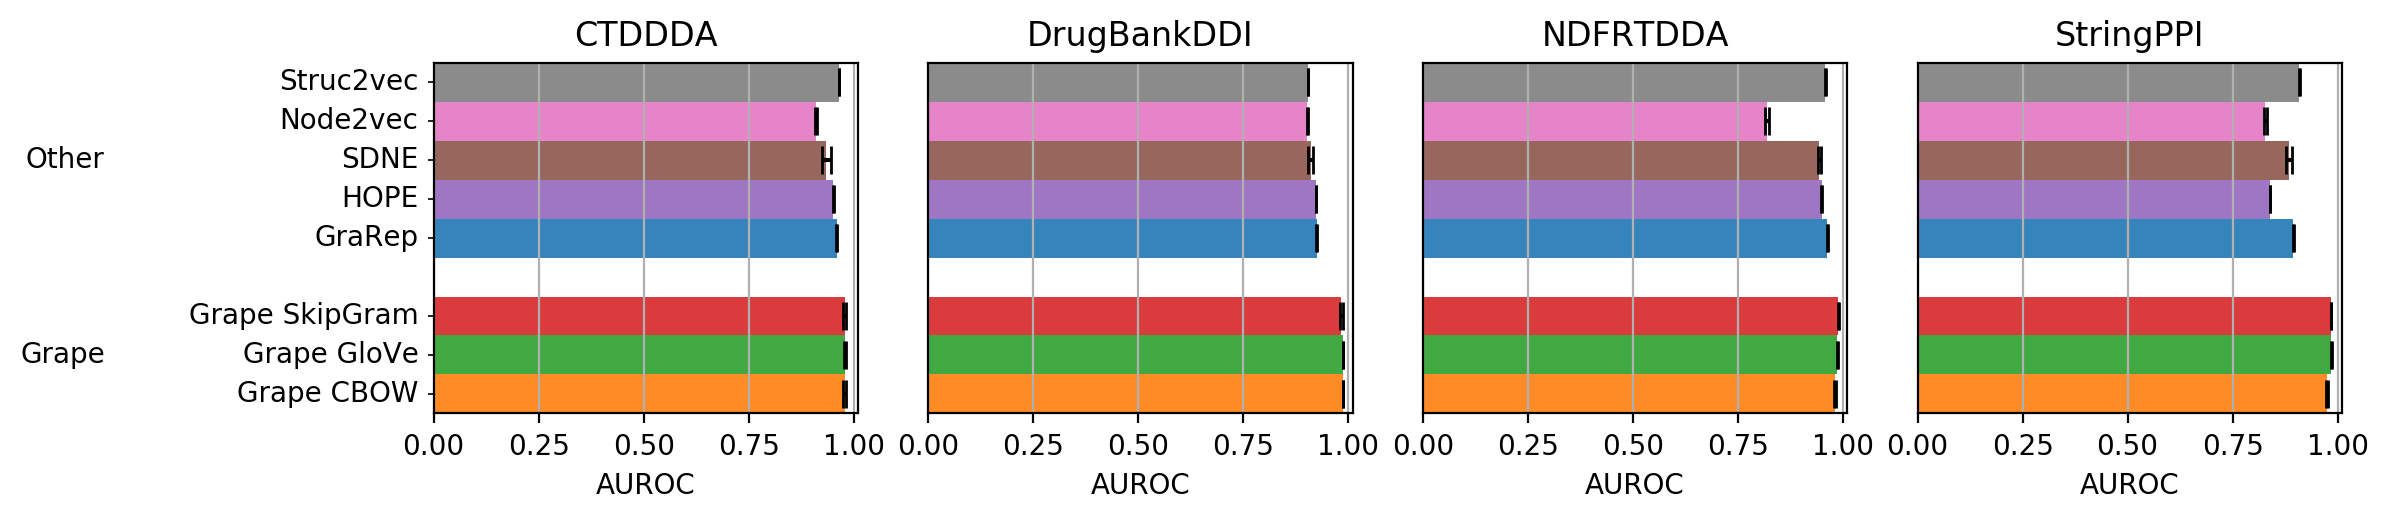

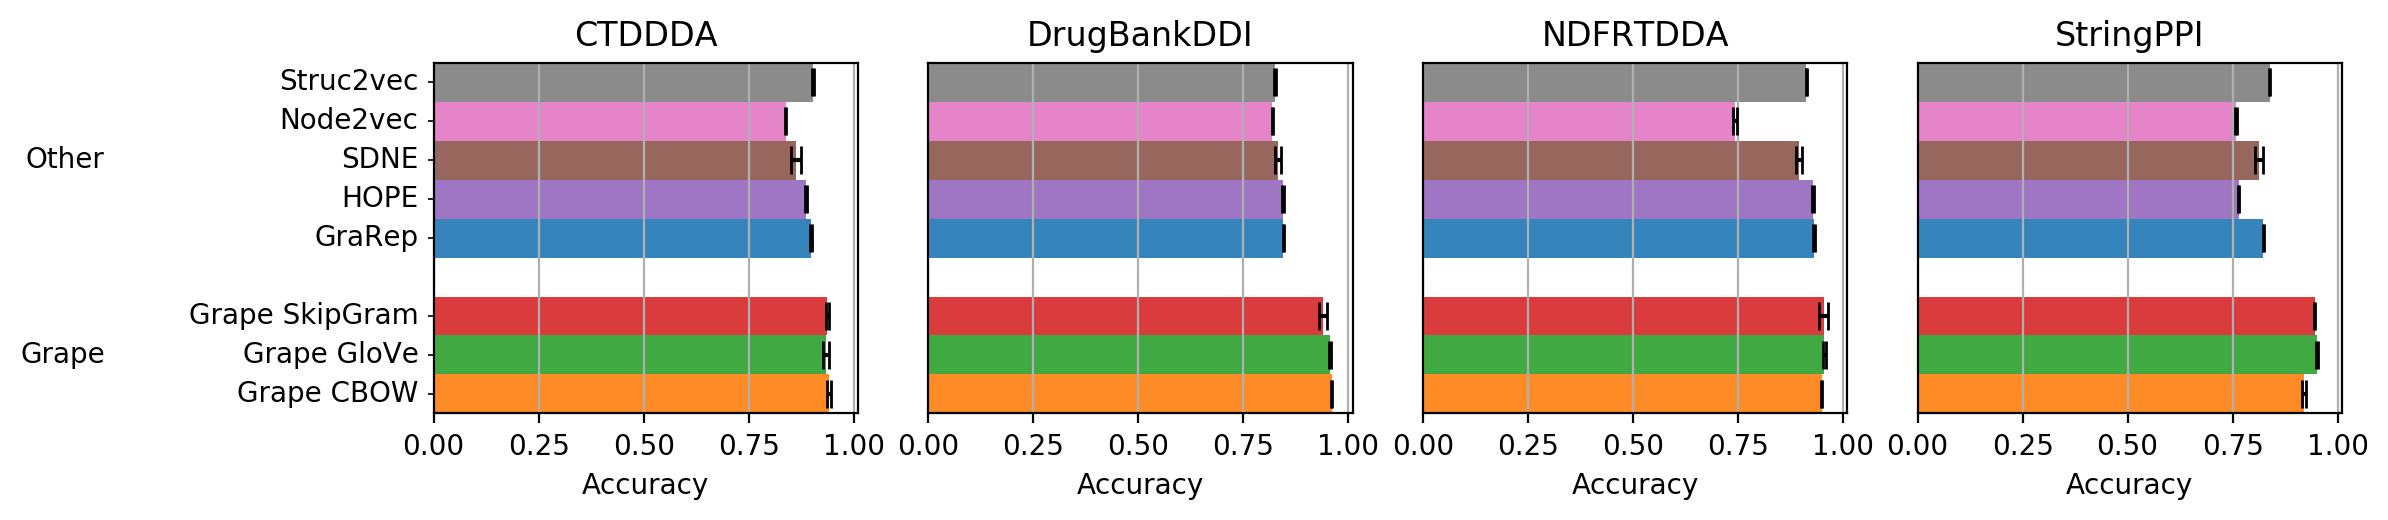

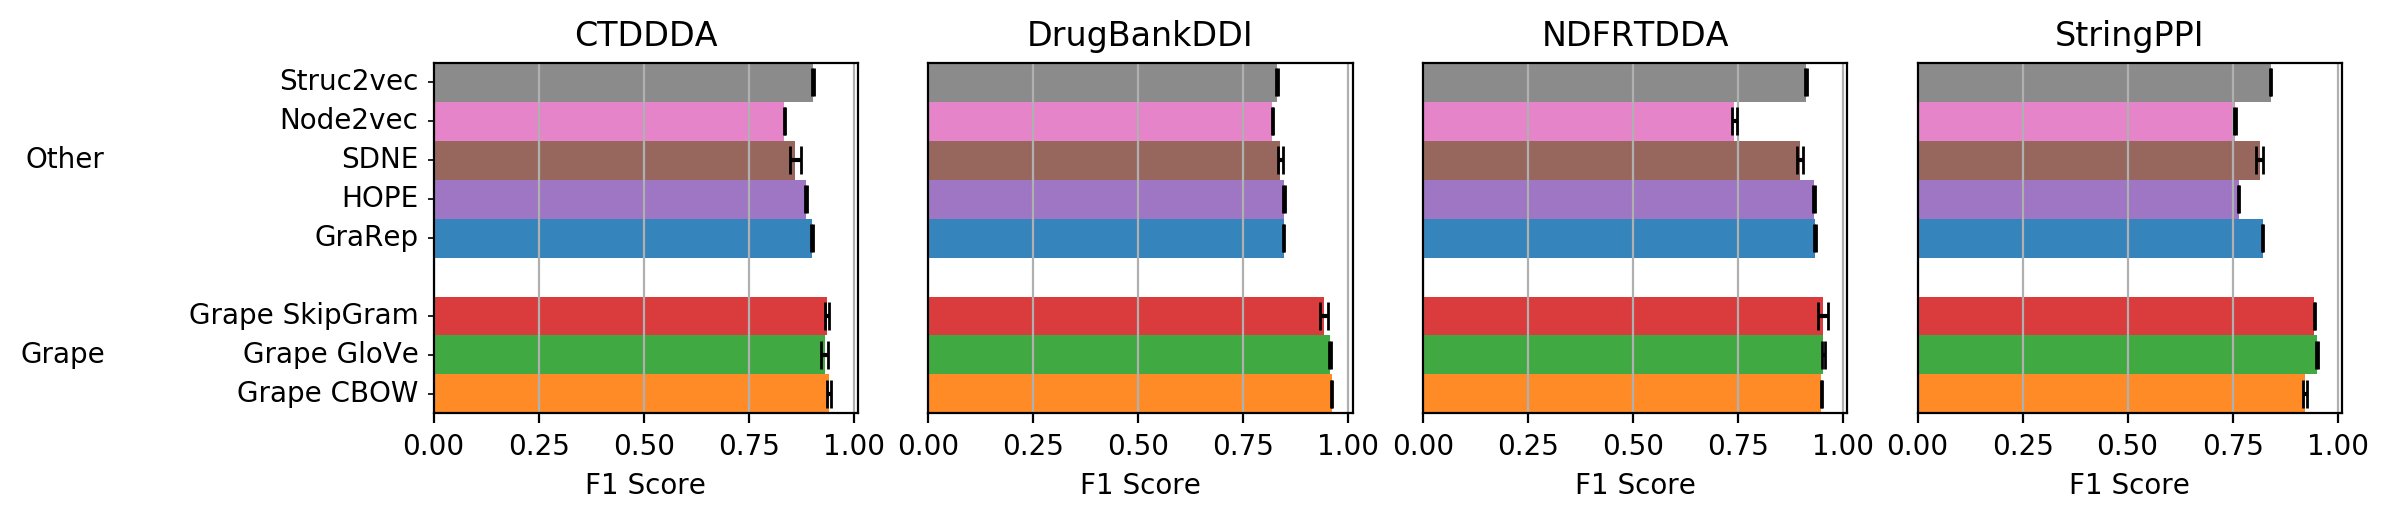

In [23]:
barplots(
    all_results,
    height=3,
    subplots=True,
    orientation="horizontal",
    use_multiprocessing=False,
    show_legend=False,
    unique_minor_labels=True
)